# 🐕   P E T I C O S   🐈

# Importação

### Leitura, Tratamento e Análise

In [1]:
# o pandas é usado para ler e manipular os dados da nossa base (o arquivo)
import pandas as pd

# o matplotlib e plotly para mostrar os dados em forma de gráficos
import matplotlib.pyplot as plt
import plotly.express as px

# o pickle é usado para ler um modelo criado em outro arquivo
import pickle

# o numpy é usado para o tratamento dos outliers
import numpy as np

# Funções

In [2]:
# Essa função remove o último caractere de uma string se for um determinado caractere
def remove_last_char(string, char):
    if string.endswith(char):
        return string[:-1]
    return 

# Essa função faz o mesmo que o anterior para cada linha de uma coluna de um dataframe
def df_remove_last_char(df, char):
    df_2 = []
    for i in df:
        df_2.append(remove_last_char(i, char))
    return df_2

# Leitura e tratamento do DataFrame

## Leitura

#### Colunas do DataFrame (sem tratamento):

 - age: idade das pessoas
 
 - gender: gênero que a pessoa se identifica ["Masculino", "Feminino", "Outros"]
 
 - time_in_social_media: tempo médio que a pessoa passa, por dia, usando redes sociais.
 
 - people_in_the_house: quantas pessoas (contando com a pessoa) moram em sua casa
 
 - avg_monthly_familiar_income: intervalo de renda familiar média mensal da pessoa ["Menos de R$3000", "Entre R$3000 e R$7000", "Entre R$7000 e R10000", "Entre R$10000 e R$22000", "Mais que R$22000", "Prefiro não dizer😭"]
 
 - is_lgbt: se a pessoa faz parte da comunidade LGBTQIAPN+ ou não
  
 - has_pets: se a pessoa tem pets ou não
 
 - quantity_of_pets: quantidade de pets que a pessoa tem

 - forgets: se a pessoa costuma esquecer tarefas relacionadas aos seus pets
 
 - feeling: como a pessoa se sente ao ver fotos de pets (em uma escala de 0 a 4)
 
 - would_use: resposta se a pessoa usaria uma rede social voltada a pets
  
 - would_report: se a pessoa reportaria um cachorro abandonado se o encontrasse ["Não", "Provavelmente não", "Talvez", "Provavelmente sim", "Sim"]

⚠️Faltaram as colunas da espécie dos pets, por isso, serão usados alguns modelos feitos com o forms 1⚠️

In [3]:
df = pd.read_excel('data/data.xlsx').loc[:, 'age':]
display(df)

,age,gender,time_in_sociala_media,people_in_the_house,avg_monthly_familiar_income,is_lgbt,has_pets,quantity_of_pets,forgets,feeling,would_use,would_report
0,18,NaN,4.0,6,NaN,NaN,Sim,5.0,Mais ou menos,NaN,Talvez,Provavelmente sim
1,17,Feminino,3.0,3,Entre R$3000 e R$7000,NaN,Não,NaN,NaN,NaN,Sim,Sim
2,47,Feminino,2.0,3,Entre R$3000 e R$7000,NaN,Não,NaN,NaN,NaN,Sim,Sim
3,17,Feminino,2.0,4,Entre R$3000 e R$7000,NaN,Sim,2.0,Sim,5.0,Sim,Sim
4,16,Masculino,2.0,3,Entre R$10000 e R$22000,NaN,Sim,1.0,Sim,3.0,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...
258,11,Feminino,1.0,3,Menos de R$3000,Não,Sim,1.0,Sim,5.0,Sim,Sim
259,11,Prefiro não dizer,5.0,4,Entre R$7000 e R10000,Sim,Sim,1.0,Mais ou menos,5.0,Talvez,Talvez
260,17,Masculino,0.0,4,Prefiro não dizer😭,Não,Não,NaN,NaN,4.0,Sim,Sim
261,12,Prefiro não dizer,0.0,4,Prefiro não dizer😭,Não,Sim,1.0,Mais ou menos,5.0,Não,Provavelmente sim


In [4]:
df['quantity_of_pets'].median()

1.0

In [5]:
non_definded_lgbt = df.loc[~df['is_lgbt'].isin([0,1])]

## Tratamento

### Transformando as colunas em inteiro

#### Colunas:
 - Nas colunas numéricas, foram removidos os outliers
 - gender: Masculino = 0, Feminino = 1, outros = 2
 - has_pets: Não = 0, Sim = 1
 - forgets: Não = 0, Todo o resto = 1 (se a pessoa colocou outra coisa como talvez, ou geralmente, consideramos que ela esqueça)
 - would_use: Sim = 1, Todo o resto = 0 (se a pessoa colocou que talvez usaria, consideramos como alguém que não usaria)
 - report_abandoned: Não = 0, Provavelmente Não = 1, Talvez = 2, Provavelmente sim = 3, Sim = 4 (consideramos quem não respondeu como talvez)

In [6]:
## Colunas numéricas
for column in df:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        
        upper_bound = Q3 + 1.5 * IQR

        outliers = [x for x in df[column].to_list() if x < 0 or x > upper_bound]
        df = df.loc[~df[column].isin(outliers)]

## coluna gender
df.loc[~df['gender'].str.strip().isin(['Feminino', 'Masculino']), 'gender'] = 2
df.loc[df['gender'].str.strip() == 'Masculino', 'gender'] = 0
df.loc[df['gender'].str.strip() == 'Feminino', 'gender'] = 1

## coluna has_pets
df.loc[df['has_pets'].str.strip() == 'Não', 'has_pets'] = 0
df.loc[df['has_pets'].str.strip() == 'Sim', 'has_pets'] = 1

## coluna forgets
df.loc[df['forgets'].str.strip() != 'Não', 'forgets'] = 1
df.loc[df['forgets'].str.strip() == 'Não', 'forgets'] = 0

## coluna would_use
df.loc[df['would_use'].str.strip() == 'Não', 'would_use'] = 0
df.loc[df['would_use'].str.strip() == 'Talvez', 'would_use'] = 0.5
df.loc[df['would_use'].str.strip() == 'Sim', 'would_use'] = 1

## coluna report_abandoned
df.loc[df['would_report'].str.strip() == 'Não', 'would_report'] = 0
df.loc[df['would_report'].str.strip() == 'Provavelmente não', 'would_report'] = 1
df.loc[df['would_report'].str.strip() == 'Talvez', 'would_report'] = 2
df.loc[df['would_report'].str.strip() == 'Provavelmente sim', 'would_report'] = 3
df.loc[df['would_report'].str.strip() == 'Sim', 'would_report'] = 4
df['would_report'] = df['would_report'].fillna(2)

## coluna avg_monthly_familiar_income
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Menos de R$3000', 'avg_monthly_familiar_income'] = 1
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Entre R$3000 e R$7000', 'avg_monthly_familiar_income'] = 2
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Entre R$7000 e R10000', 'avg_monthly_familiar_income'] = 3
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Entre R$10000 e R$22000', 'avg_monthly_familiar_income'] = 4
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Mais que R$22000', 'avg_monthly_familiar_income'] = 5
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Prefiro não dizer😭', 'avg_monthly_familiar_income'] = 0

## coluna is_lgbt
df.loc[df['is_lgbt'] == 'Não', 'is_lgbt'] = 0
df.loc[df['is_lgbt'] == 'Sim', 'is_lgbt'] = 1

## coluna quantity of pets
df['quantity_of_pets'] = df['quantity_of_pets'].fillna(0)

## coluna feeling
df['feeling'] = df['feeling'].fillna(3)

C:\Users\guilhermelanzoni-ieg\AppData\Local\Temp\ipykernel_30888\1067918527.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['would_report'] = df['would_report'].fillna(2)


### Modelos para a criação das colunas que faltam

#### Nome das coluns da base (deixando igual aos do forms 1)

In [7]:
## a coluna is_lgbt foi salva em uma variável para não ser perdida, pois não existe na outra base
is_lgbt = df['is_lgbt']

In [8]:
## reordenando colunas, para colocar a resposta (usaria) no final
df = df[['age', 'gender', 'time_in_sociala_media', 'people_in_the_house', 'avg_monthly_familiar_income', 'has_pets', 'quantity_of_pets', 'forgets', 'would_report', 'feeling', 'would_use',]].loc[~df['feeling'].isna()]

In [9]:
## nomes antigos
names = df.columns

## nomes novos
new = ['age', 'gender', 'time_in_social_media', 'people_living_together', 'social_class', 'has_pets', 'number_of_pets', 'forgets', 'report_abandoned', 'feeling', 'would_use']

## renomeando as colunas
df.rename(columns={names[i]: new[i] for i in range(len(names))}, inplace=True)

#### Coluna has_others (se a pessoa tem animais de outra espécie)

In [10]:
## desserialização do modelo
with open('model_others.pkl', 'rb') as file:
    model = pickle.load(file)

In [11]:
## predizendo os valores da coluna has_others
df['has_others'] = model.predict(df)
df

,age,gender,time_in_social_media,people_living_together,social_class,has_pets,number_of_pets,forgets,report_abandoned,feeling,would_use,has_others
1,17,1,3.0,3,2,0,0.0,1,4,3.0,1,0
2,47,1,2.0,3,2,0,0.0,1,4,3.0,1,0
3,17,1,2.0,4,2,1,2.0,1,4,5.0,1,1
4,16,0,2.0,3,4,1,1.0,1,4,3.0,0,0
5,11,2,5.0,4,2,1,1.0,1,2,5.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
257,12,1,3.0,3,3,0,0.0,1,4,5.0,0.5,0
258,11,1,1.0,3,1,1,1.0,1,4,5.0,1,0
259,11,2,5.0,4,3,1,1.0,1,2,5.0,0.5,0
260,17,0,0.0,4,0,0,0.0,1,4,4.0,1,0


#### Coluna has_dogs (se a pessoa tem ao menos um cachorro)

In [12]:
## desserialização do modelo
with open('model_dogs.pkl', 'rb') as file:
    model = pickle.load(file)

In [13]:
df = df[['age', 'gender', 'time_in_social_media', 'people_living_together', 'social_class', 'has_pets', 'number_of_pets', 'has_others', 'forgets', 'report_abandoned', 'feeling', 'would_use']]

## predizendo os valores da coluna has_dogs
df['has_dog'] = model.predict(df)
df

C:\Users\guilhermelanzoni-ieg\AppData\Local\Temp\ipykernel_30888\68451229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_dog'] = model.predict(df)


,age,gender,time_in_social_media,people_living_together,social_class,has_pets,number_of_pets,has_others,forgets,report_abandoned,feeling,would_use,has_dog
1,17,1,3.0,3,2,0,0.0,0,1,4,3.0,1,0
2,47,1,2.0,3,2,0,0.0,0,1,4,3.0,1,0
3,17,1,2.0,4,2,1,2.0,1,1,4,5.0,1,1
4,16,0,2.0,3,4,1,1.0,0,1,4,3.0,0,1
5,11,2,5.0,4,2,1,1.0,0,1,2,5.0,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,12,1,3.0,3,3,0,0.0,0,1,4,5.0,0.5,1
258,11,1,1.0,3,1,1,1.0,0,1,4,5.0,1,1
259,11,2,5.0,4,3,1,1.0,0,1,2,5.0,0.5,1
260,17,0,0.0,4,0,0,0.0,0,1,4,4.0,1,1


#### Coluna has_cats (se a pessoa tem ao menos um gato)

In [14]:
## desserialização do modelo
with open('model_cats.pkl', 'rb') as file:
    model = pickle.load(file)

In [15]:
df = df[['age', 'gender', 'time_in_social_media', 'people_living_together', 'social_class', 'has_pets', 'number_of_pets', 'has_dog', 'has_others', 'forgets', 'report_abandoned', 'feeling', 'would_use']]
df['has_cat'] = model.predict(df)
df

C:\Users\guilhermelanzoni-ieg\AppData\Local\Temp\ipykernel_30888\429353936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_cat'] = model.predict(df)


,age,gender,time_in_social_media,people_living_together,social_class,has_pets,number_of_pets,has_dog,has_others,forgets,report_abandoned,feeling,would_use,has_cat
1,17,1,3.0,3,2,0,0.0,0,0,1,4,3.0,1,0
2,47,1,2.0,3,2,0,0.0,0,0,1,4,3.0,1,0
3,17,1,2.0,4,2,1,2.0,1,1,1,4,5.0,1,0
4,16,0,2.0,3,4,1,1.0,1,0,1,4,3.0,0,0
5,11,2,5.0,4,2,1,1.0,1,0,1,2,5.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,12,1,3.0,3,3,0,0.0,1,0,1,4,5.0,0.5,0
258,11,1,1.0,3,1,1,1.0,1,0,1,4,5.0,1,0
259,11,2,5.0,4,3,1,1.0,1,0,1,2,5.0,0.5,0
260,17,0,0.0,4,0,0,0.0,1,0,1,4,4.0,1,0


### Adicionando de volta a coluna is_lgbt

In [16]:
df['is_lgbt'] = is_lgbt

C:\Users\guilhermelanzoni-ieg\AppData\Local\Temp\ipykernel_30888\4221637580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_lgbt'] = is_lgbt


### Organizando o DataFrame

In [17]:
df = df[['age', 'gender', 'time_in_social_media', 'people_living_together', 'social_class', 'is_lgbt', 'has_pets', 'number_of_pets', 'has_dog', 'has_cat', 'has_others', 'forgets', 'report_abandoned', 'feeling', 'would_use']]

# Base tratada

In [18]:
df.to_csv('base_tratada_forms_2.csv')

# Matriz de correlação

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'gender'),
 Text(2.5, 0, 'time_in_social_media'),
 Text(3.5, 0, 'people_living_together'),
 Text(4.5, 0, 'social_class'),
 Text(5.5, 0, 'is_lgbt'),
 Text(6.5, 0, 'has_pets'),
 Text(7.5, 0, 'number_of_pets'),
 Text(8.5, 0, 'has_dog'),
 Text(9.5, 0, 'has_cat'),
 Text(10.5, 0, 'has_others'),
 Text(11.5, 0, 'forgets'),
 Text(12.5, 0, 'report_abandoned'),
 Text(13.5, 0, 'feeling'),
 Text(14.5, 0, 'would_use')]

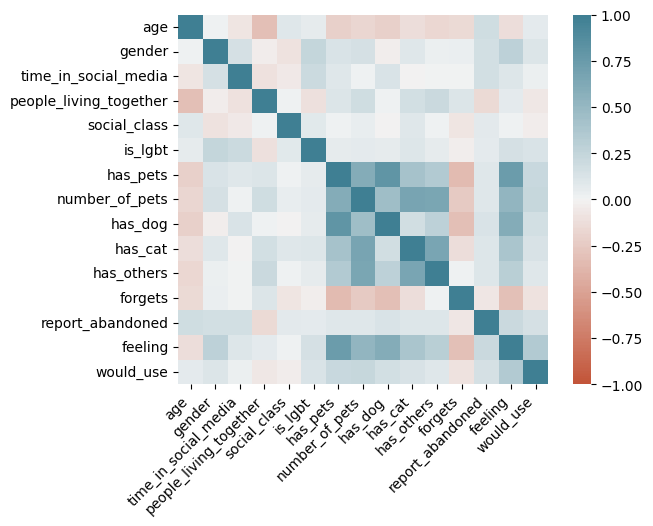

In [19]:
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)